In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Initial data exploration


In [2]:
whole=pd.read_csv('2015_Street_Tree_Census_-_Tree_Data.csv')

In [3]:
whole.drop(columns=['tree_id', 'block_id', 'created_at', 'status'],inplace=True)

In [4]:
subset=whole.dropna(subset=['health'])

In [5]:
kept = ['tree_dbh', 'curb_loc', 'health', 
        'spc_common', 'steward', 'guards', 'sidewalk', 'user_type', 
        'root_stone', 'root_grate', 'root_other', 
        'trunk_wire', 'trnk_light', 'trnk_other',
        'brch_light', 'brch_shoe', 'brch_other', 'zip_city',
        'st_senate', 'st_assem', 'borocode', 'cncldist', 'nta_name', 
        'community board', 'latitude', 'longitude']
tree2015=whole[kept].dropna()

In [7]:
total_num = pd.DataFrame(subset.loc[:,['borough','health']].groupby('borough').count()['health'])#.values[0]
bar_data=pd.DataFrame(subset.loc[:,['borough','health']].groupby(['borough','health'])['health'].size().unstack())

per_data = bar_data.merge(total_num, how='left', on ='borough')
per_data['Fair'] = per_data['Fair']/per_data['health']
per_data['Good'] = per_data['Good']/per_data['health']
per_data['Poor'] = per_data['Poor']/per_data['health']

In [43]:
per_data.iloc[:,0:3]

,Fair,Good,Poor
borough,,,
Bronx,0.135100,0.826494,0.038407
Brooklyn,0.147711,0.814238,0.038051
Manhattan,0.183574,0.758614,0.057812
Queens,0.145180,0.815249,0.039572
Staten Island,0.143284,0.814939,0.041778


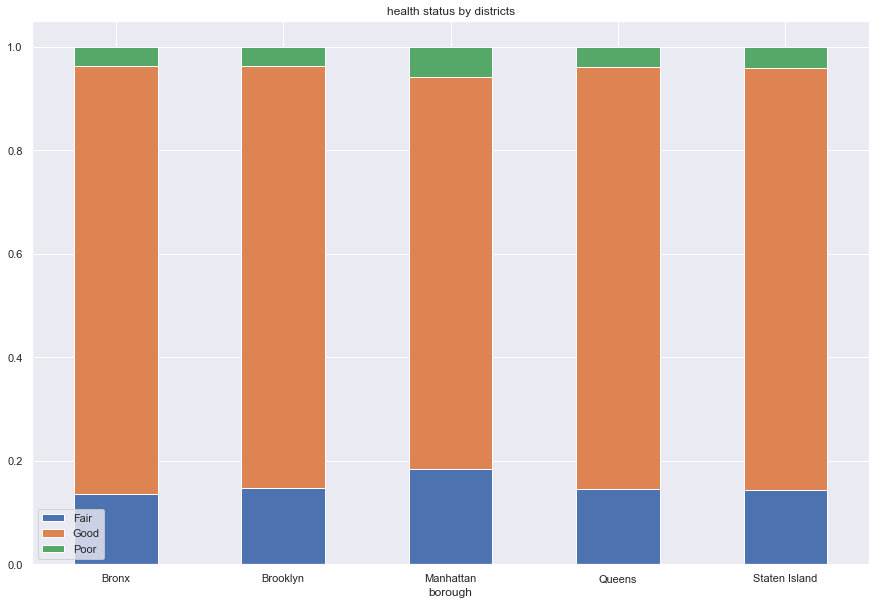

In [8]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
#bar_data=pd.DataFrame(subset.loc[:,['borough','health']].groupby(['borough','health'])['health'].size().unstack())
per_data.iloc[:,0:3].plot(kind='bar', stacked=True)
plt.title('health status by districts')
plt.xticks(rotation=0, ha='center')
plt.show()


In [25]:
pd.DataFrame(tree2015.loc[:,['root_stone', 'root_grate','root_other']].value_counts())

,,,0
root_stone,root_grate,root_other,
No,No,No,488433
Yes,No,No,130265
No,No,Yes,20626
Yes,No,Yes,9306
No,Yes,No,2795
Yes,Yes,No,351
No,Yes,Yes,315
Yes,Yes,Yes,75


choose top 5 combination

In [35]:
no_root = tree2015[tree2015['root_stone']=='No'][tree2015['root_grate']=='No'][tree2015['root_other']=='No']['health'].value_counts()
stone = tree2015[tree2015['root_stone']=='Yes'][tree2015['root_grate']=='No'][tree2015['root_other']=='No']['health'].value_counts()
other = tree2015[tree2015['root_stone']=='No'][tree2015['root_grate']=='No'][tree2015['root_other']=='Yes']['health'].value_counts()
stone_other = tree2015[tree2015['root_stone']=='Yes'][tree2015['root_grate']=='No'][tree2015['root_other']=='Yes']['health'].value_counts()
grate=tree2015[tree2015['root_stone']=='No'][tree2015['root_grate']=='Yes'][tree2015['root_other']=='No']['health'].value_counts()

<ipython-input-35-be20ec4190bf>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_root = tree2015[tree2015['root_stone']=='No'][tree2015['root_grate']=='No'][tree2015['root_other']=='No']['health'].value_counts()
<ipython-input-35-be20ec4190bf>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stone = tree2015[tree2015['root_stone']=='Yes'][tree2015['root_grate']=='No'][tree2015['root_other']=='No']['health'].value_counts()
<ipython-input-35-be20ec4190bf>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  other = tree2015[tree2015['root_stone']=='No'][tree2015['root_grate']=='No'][tree2015['root_other']=='Yes']['health'].value_counts()
<ipython-input-35-be20ec4190bf>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stone_other = tree2015[tree2015['root_stone']=='Yes'][tree2015['root_grate']=='No'][tree2015['root_other']=='Yes']['health'].value_counts()
<ipython

In [39]:
rootProblem=pd.DataFrame([no_root,stone,other, stone_other, grate])

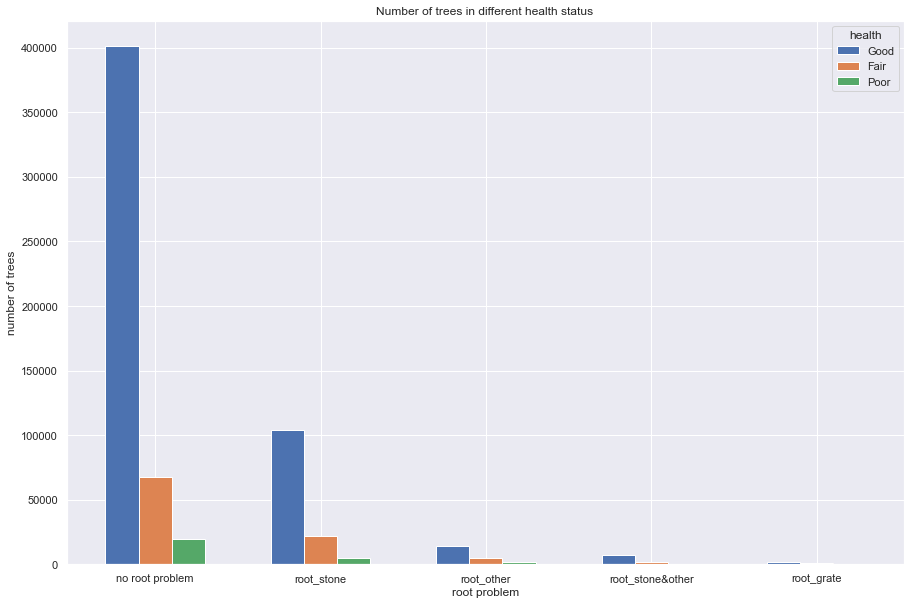

In [45]:
X_axis = np.arange(5)
x=['no root problem','root_stone', 'root_other','root_stone&other','root_grate']
#fig, ax = plt.subplots(1,2)
y0=rootProblem['Good']
y1=rootProblem['Fair']
y2=rootProblem['Poor']
plt.bar(X_axis-0.2, y0, 0.2, label = 'Good')
plt.bar(X_axis, y1, 0.2, label = 'Fair')
plt.bar(X_axis+0.2, y2, 0.2, label = 'Poor')
plt.xticks(X_axis, x)
plt.xlabel("root problem")
plt.ylabel("number of trees")
plt.title("Number of trees in different health status by root problem")
plt.legend(title='health')



In [46]:
no_root = tree2015[tree2015['root_stone']=='No'][tree2015['root_grate']=='No'][tree2015['root_other']=='No']['health'].value_counts()/488433
stone = tree2015[tree2015['root_stone']=='Yes'][tree2015['root_grate']=='No'][tree2015['root_other']=='No']['health'].value_counts()/130265
other = tree2015[tree2015['root_stone']=='No'][tree2015['root_grate']=='No'][tree2015['root_other']=='Yes']['health'].value_counts()/20626
stone_other = tree2015[tree2015['root_stone']=='Yes'][tree2015['root_grate']=='No'][tree2015['root_other']=='Yes']['health'].value_counts()/9306
grate=tree2015[tree2015['root_stone']=='No'][tree2015['root_grate']=='Yes'][tree2015['root_other']=='No']['health'].value_counts()/2795

<ipython-input-46-0ecd5f2277f3>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_root = tree2015[tree2015['root_stone']=='No'][tree2015['root_grate']=='No'][tree2015['root_other']=='No']['health'].value_counts()/488433
<ipython-input-46-0ecd5f2277f3>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stone = tree2015[tree2015['root_stone']=='Yes'][tree2015['root_grate']=='No'][tree2015['root_other']=='No']['health'].value_counts()/130265
<ipython-input-46-0ecd5f2277f3>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  other = tree2015[tree2015['root_stone']=='No'][tree2015['root_grate']=='No'][tree2015['root_other']=='Yes']['health'].value_counts()/20626
<ipython-input-46-0ecd5f2277f3>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stone_other = tree2015[tree2015['root_stone']=='Yes'][tree2015['root_grate']=='No'][tree2015['root_other']=='Yes']['health'].val

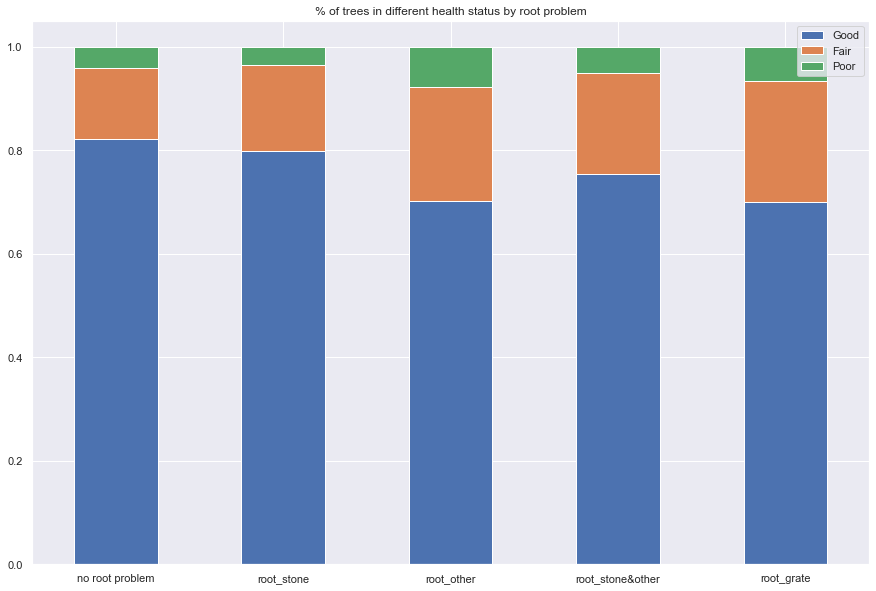

In [58]:
Per_rootProblem=pd.DataFrame([no_root,stone,other, stone_other, grate])
Per_rootProblem.index=x
sns.set(rc={'figure.figsize':(15,10)})
Per_rootProblem.plot(kind='bar', stacked=True)
plt.title('% of trees in different health status by root problem')
plt.xticks(rotation=0, ha='center')
plt.show()

# sample imbalance data

In [9]:
tree2015['health'].value_counts()

Good    528845
Fair     96504
Poor     26817
Name: health, dtype: int64

undersample good

In [10]:
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.model_selection import train_test_split
X=tree2015.drop(columns=['health'])
y=tree2015['health']
X_dev, X_test, y_dev, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)
rus = RandomUnderSampler(replacement=False)
X_dev_subsample,y_dev_subsample = rus.fit_resample(X_dev,y_dev)
y_dev_subsample.value_counts()

Poor    21509
Fair    21509
Good    21509
Name: health, dtype: int64

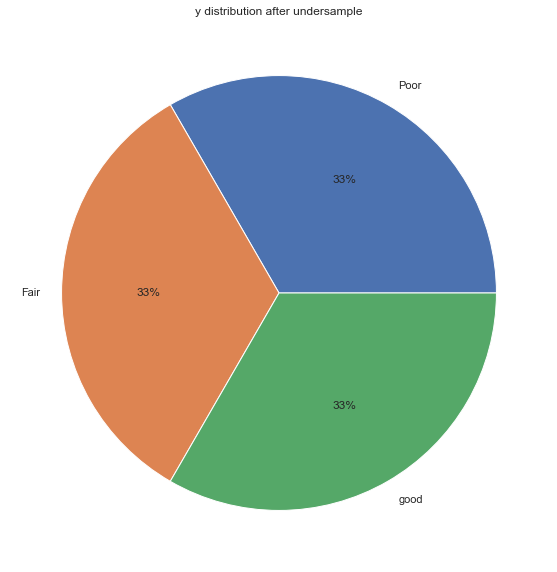

In [62]:
labels=['Poor','Fair','good']
plt.pie(y_dev_subsample.value_counts(), labels = labels, autopct='%.0f%%')
plt.title('y distribution after undersample')
plt.show()


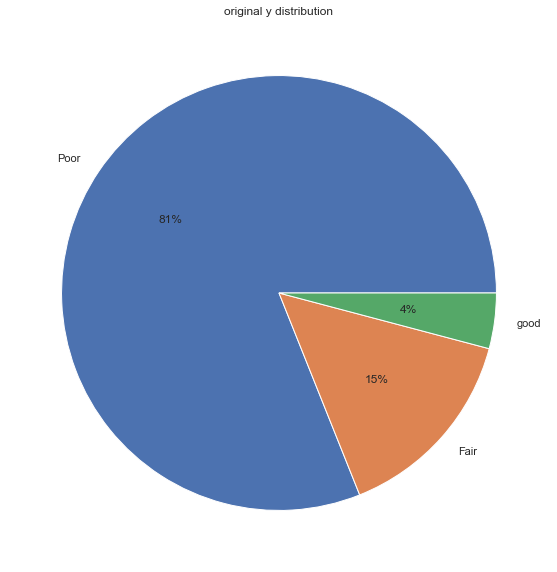

In [64]:

plt.pie(y_dev.value_counts(), labels = labels, autopct='%.0f%%')
plt.title('original y distribution')
plt.show()